In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
Manha = gpd.read_file('shape/Manha/acs2017_5yr_B01003_14000US36047056300.shp')
Bronx = gpd.read_file('shape/Bronx/acs2017_5yr_B01003_14000US36005013300.shp')
Brooklyn = gpd.read_file('shape/Brooklyn/acs2017_5yr_B01003_14000US36047990100.shp')
New_island = gpd.read_file('shape/New_island/acs2017_5yr_B01003_14000US36047005602.shp')
Queens = gpd.read_file('shape/Queens/acs2017_5yr_B01003_14000US36047990100.shp')

In [3]:
Manha = Manha[Manha['name'] != 'Manhattan borough, New York County, NY']
Manha = Manha[Manha['name'].str.contains('NY')]

Bronx = Bronx[Bronx['name'] != 'Bronx borough, Bronx County, NY']
Bronx = Bronx[Bronx['name'].str.contains('NY')]

Brooklyn = Brooklyn[Brooklyn['name'] != 'Brooklyn borough, Kings County, NY']
Brooklyn = Brooklyn[Brooklyn['name'].str.contains('NY')]

New_island = New_island[New_island['name'] != 'Staten Island borough, Richmond County, NY']
New_island = New_island[New_island['name'].str.contains('NY')]

Queens = Queens[Queens['name'] != 'Queens borough, Queens County, NY']
Queens = Queens[Queens['name'].str.contains('NY')]

In [4]:
map_list = [Manha, Bronx, Brooklyn, New_island, Queens]
all_shapes = pd.concat(map_list)

In [5]:
all_shapes = all_shapes.drop(['B01003001', 'B01003001e'], axis=1)

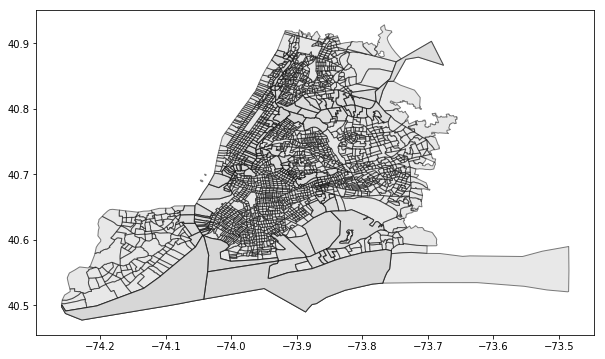

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
all_shapes.plot(color='lightgrey',
                      edgecolor = 'black',
                      ax = ax,
                      alpha=.5)

In [7]:
ny_zc = gpd.read_file('shape/New_york_zipcode/newyork.shp')

In [8]:
new_york = gpd.overlay(
    all_shapes,
    ny_zc,
    how="intersection",
    use_sindex=False
)

C:\Users\rodan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 'use_sindex' is deprecated. The overlay operation always requires a spatial index (rtree).
  """


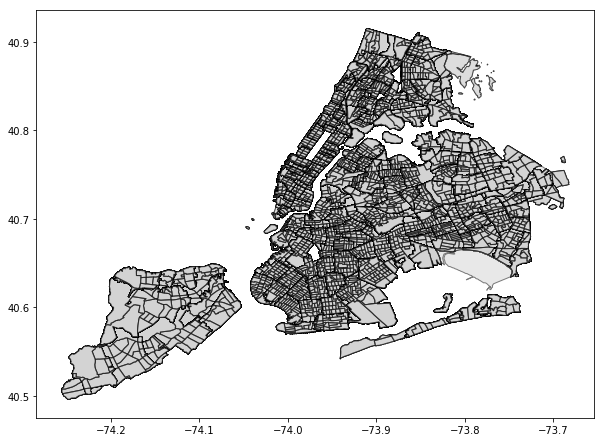

In [249]:
fig, ax = plt.subplots(figsize = (10,10))
new_york.plot(color='lightgrey',
                      edgecolor = 'black',
                      ax = ax,
                      alpha=.5)

In [9]:
new_york.crs

{'init': 'epsg:4326'}

In [252]:
new_york.to_file('shape/New_York/new_york.shp')

In [247]:
new_york.shape

(257753, 8)

# Socio Data

Population

In [2]:
bronx = pd.read_csv('total_pop/Bronx/acs2017_5yr_B01003_14000US36005013300.csv')
bronx = bronx[bronx['name'] != 'Bronx borough, Bronx County, NY']

brook = pd.read_csv('total_pop/Brooklyn/acs2017_5yr_B01003_14000US36047990100.csv')
brook = brook[brook['name'] != 'Brooklyn borough, Kings County, NY']

manh = pd.read_csv('total_pop/Man/acs2017_5yr_B01003_14000US36047056300.csv')
manh = manh[manh['name'] != 'Manhattan borough, New York County, NY']

new_is = pd.read_csv('total_pop/New_island/acs2017_5yr_B01003_14000US36047005602.csv')
new_is = new_is[new_is['name'] != 'Staten Island borough, Richmond County, NY']

queens = pd.read_csv('total_pop/Queens/acs2017_5yr_B01003_14000US36047990100.csv')
queens = queens[queens['name'] != 'Queens borough, Queens County, NY']

In [3]:
data = [bronx, brook, manh, new_is, queens]
pop = pd.concat(data).drop_duplicates()
pop.shape

(2250, 4)

In [4]:
len(pop['name'].unique())

2250

In [5]:
pop = pop.drop('B01003001, Error', axis=1)
pop.rename(columns={'B01003001': 'pop'}, inplace=True)

In [6]:
pop = pop[pop['name'].str.contains('NY')]
pop.shape

(2206, 3)

Ethnicity

In [7]:
bronx = pd.read_csv('total_pop/Bronx/ethnicity.csv')
bronx = bronx[bronx['name'].str.contains('Census Tract')]

brook = pd.read_csv('total_pop/Brooklyn/ethnicity.csv')
brook = brook[brook['name'].str.contains('Census Tract')]

manh = pd.read_csv('total_pop/Man/ethnicity.csv')
manh = manh[manh['name'].str.contains('Census Tract')]

new_is = pd.read_csv('total_pop/New_island/ethnicity.csv')
new_is = new_is[new_is['name'].str.contains('Census Tract')]

queens = pd.read_csv('total_pop/Queens/ethnicity.csv')
queens = queens[queens['name'].str.contains('Census Tract')]

In [8]:
race = pd.concat([bronx, brook, manh, new_is, queens]).drop_duplicates()
race.shape

(2209, 22)

In [9]:
len(race['name'].unique())

2209

In [10]:
race = race[race['name'].str.contains('NY')]
race.shape

(2167, 22)

In [11]:
race.head()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,B02001006,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error"
1,14000US36005000100,"Census Tract 1, Bronx, NY",7411,308,1464,223,4509,286,22,22,...,0,16,1201,211,90,47,29,24,61,35
2,14000US36005000200,"Census Tract 2, Bronx, NY",5058,773,2665,727,1233,467,0,16,...,0,16,742,397,260,200,0,16,260,200
3,14000US36005000400,"Census Tract 4, Bronx, NY",5944,502,2616,480,1962,527,30,35,...,0,16,1085,459,197,128,0,16,197,128
4,14000US36005001600,"Census Tract 16, Bronx, NY",6115,536,2685,554,2320,446,0,16,...,0,16,989,427,110,90,41,51,69,73
5,14000US36005001900,"Census Tract 19, Bronx, NY",2817,307,519,134,1054,206,0,11,...,0,11,1049,185,117,83,98,79,19,19


In [12]:
notinrace = pop[~pop['name'].isin(race['name'])]

In [13]:
ad1 = pd.read_csv('total_pop/eth_1.csv')
ad1 = ad1[ad1['name'].str.contains('Census Tract')]

ad2 = pd.read_csv('total_pop/eth_2.csv')
ad2 = ad2[ad2['name'].str.contains('Census Tract')]

In [14]:
race = pd.concat([race, ad1, ad2]).drop_duplicates()

In [15]:
cols = {'B02001002':'white', 'B02001003':'black', 'B02001005':'asian'}

In [16]:
race = race[['name', 'B02001002', 'B02001003', 'B02001005']]
race.rename(columns=cols, inplace=True)
race.head()

,name,white,black,asian
1,"Census Tract 1, Bronx, NY",1464,4509,125
2,"Census Tract 2, Bronx, NY",2665,1233,158
3,"Census Tract 4, Bronx, NY",2616,1962,54
4,"Census Tract 16, Bronx, NY",2685,2320,11
5,"Census Tract 19, Bronx, NY",519,1054,78


### Age

In [17]:
bronx = pd.read_csv('total_pop/Bronx/age.csv')
bronx = bronx[bronx['name'].str.contains('Census Tract')]

brook = pd.read_csv('total_pop/Brooklyn/age.csv')
brook = brook[brook['name'].str.contains('Census Tract')]

manh = pd.read_csv('total_pop/Man/age.csv')
manh = manh[manh['name'].str.contains('Census Tract')]

new_is = pd.read_csv('total_pop/New_island/age.csv')
new_is = new_is[new_is['name'].str.contains('Census Tract')]

queens = pd.read_csv('total_pop/Queens/age.csv')
queens = queens[queens['name'].str.contains('Census Tract')]

In [18]:
age = pd.concat([bronx, brook, manh, new_is, queens]).drop_duplicates()
age.shape

(2209, 100)

In [19]:
len(age['name'].unique())

2209

In [20]:
notin = pop[~pop['name'].isin(age['name'])]

In [21]:
ad1 = pd.read_csv('total_pop/age1.csv')
ad1 = ad1[ad1['name'].str.contains('Census Tract')]

ad2 = pd.read_csv('total_pop/age2.csv')
ad2 = ad2[ad2['name'].str.contains('Census Tract')]

In [22]:
age = pd.concat([age, ad1, ad2]).drop_duplicates()
age.head()

,geoid,name,B01001001,"B01001001, Error",B01001002,"B01001002, Error",B01001003,"B01001003, Error",B01001004,"B01001004, Error",...,B01001045,"B01001045, Error",B01001046,"B01001046, Error",B01001047,"B01001047, Error",B01001048,"B01001048, Error",B01001049,"B01001049, Error"
1,14000US36005000100,"Census Tract 1, Bronx, NY",7411,308,6857,327,0,16,0,16,...,9,15,0,16,0,16,0,16,0,16
2,14000US36005000200,"Census Tract 2, Bronx, NY",5058,773,2502,390,68,53,51,50,...,87,53,152,67,32,37,10,16,22,41
3,14000US36005000400,"Census Tract 4, Bronx, NY",5944,502,2984,322,148,83,175,91,...,60,46,94,50,46,33,22,24,65,58
4,14000US36005001600,"Census Tract 16, Bronx, NY",6115,536,2351,322,224,115,163,71,...,70,50,148,65,145,64,111,71,116,67
5,14000US36005001900,"Census Tract 19, Bronx, NY",2817,307,1327,210,181,74,75,43,...,15,24,10,15,13,19,20,21,0,11


In [23]:
age = age.loc[:, ~age.columns.str.contains('Error')]
age.head()

,geoid,name,B01001001,B01001002,B01001003,B01001004,B01001005,B01001006,B01001007,B01001008,...,B01001040,B01001041,B01001042,B01001043,B01001044,B01001045,B01001046,B01001047,B01001048,B01001049
1,14000US36005000100,"Census Tract 1, Bronx, NY",7411,6857,0,0,0,231,408,262,...,27,37,0,0,8,9,0,0,0,0
2,14000US36005000200,"Census Tract 2, Bronx, NY",5058,2502,68,51,149,63,81,0,...,172,139,54,132,33,87,152,32,10,22
3,14000US36005000400,"Census Tract 4, Bronx, NY",5944,2984,148,175,123,89,104,58,...,264,237,67,98,114,60,94,46,22,65
4,14000US36005001600,"Census Tract 16, Bronx, NY",6115,2351,224,163,269,92,132,32,...,212,256,98,118,91,70,148,145,111,116
5,14000US36005001900,"Census Tract 19, Bronx, NY",2817,1327,181,75,50,14,20,7,...,92,57,23,24,0,15,10,13,20,0


In [24]:
age['over 15 under 65'] = age.iloc[:, 7:20].sum(axis=1)

In [25]:
age = age[['name', 'over 15 under 65']]

In [26]:
age = age[age['name'].str.contains('NY')]
age.shape

(2674, 2)

### Education

In [27]:
bronx = pd.read_csv('total_pop/Bronx/edu.csv')
bronx = bronx[bronx['name'].str.contains('Census Tract')]

brook = pd.read_csv('total_pop/Brooklyn/edu.csv')
brook = brook[brook['name'].str.contains('Census Tract')]

manh = pd.read_csv('total_pop/Man/edu.csv')
manh = manh[manh['name'].str.contains('Census Tract')]

new_is = pd.read_csv('total_pop/New_island/edu.csv')
new_is = new_is[new_is['name'].str.contains('Census Tract')]

queens = pd.read_csv('total_pop/Queens/edu.csv')
queens = queens[queens['name'].str.contains('Census Tract')]

In [28]:
edu = pd.concat([bronx, brook, manh, new_is, queens]).drop_duplicates()
edu.shape

(2209, 60)

In [29]:
notin = pop[~pop['name'].isin(edu['name'])]

In [30]:
ad1 = pd.read_csv('total_pop/edu1.csv')
ad1 = ad1[ad1['name'].str.contains('Census Tract')]

ad2 = pd.read_csv('total_pop/edu2.csv')
ad2 = ad2[ad2['name'].str.contains('Census Tract')]

In [31]:
edu = pd.concat([edu, ad1, ad2]).drop_duplicates()
edu.head()

,geoid,name,B23006001,"B23006001, Error",B23006002,"B23006002, Error",B23006003,"B23006003, Error",B23006004,"B23006004, Error",...,B23006025,"B23006025, Error",B23006026,"B23006026, Error",B23006027,"B23006027, Error",B23006028,"B23006028, Error",B23006029,"B23006029, Error"
1,14000US36005000100,"Census Tract 1, Bronx, NY",5473,325,3226,291,0,16,0,16,...,0,16,0,16,0,16,0,16,119,53
2,14000US36005000200,"Census Tract 2, Bronx, NY",2652,485,468,150,234,114,0,16,...,0,16,377,123,342,118,35,33,33,34
3,14000US36005000400,"Census Tract 4, Bronx, NY",3471,376,259,123,95,72,0,16,...,0,16,976,236,931,218,45,57,101,71
4,14000US36005001600,"Census Tract 16, Bronx, NY",2601,271,625,165,338,132,0,16,...,0,16,347,146,347,146,0,16,57,36
5,14000US36005001900,"Census Tract 19, Bronx, NY",1735,215,355,134,191,84,0,11,...,0,11,397,85,386,86,11,11,23,21


In [32]:
edu = edu.loc[:, ~edu.columns.str.contains('Error')]
edu.head()

,geoid,name,B23006001,B23006002,B23006003,B23006004,B23006005,B23006006,B23006007,B23006008,...,B23006020,B23006021,B23006022,B23006023,B23006024,B23006025,B23006026,B23006027,B23006028,B23006029
1,14000US36005000100,"Census Tract 1, Bronx, NY",5473,3226,0,0,0,0,0,3226,...,0,0,651,119,0,0,0,0,0,119
2,14000US36005000200,"Census Tract 2, Bronx, NY",2652,468,234,0,234,208,26,234,...,556,52,190,410,377,0,377,342,35,33
3,14000US36005000400,"Census Tract 4, Bronx, NY",3471,259,95,0,95,33,62,164,...,1133,61,237,1077,976,0,976,931,45,101
4,14000US36005001600,"Census Tract 16, Bronx, NY",2601,625,338,0,338,298,40,287,...,519,42,159,404,347,0,347,347,0,57
5,14000US36005001900,"Census Tract 19, Bronx, NY",1735,355,191,0,191,137,54,164,...,364,28,142,420,397,0,397,386,11,23


In [33]:
edu = edu[edu['name'].str.contains('NY')]
edu.shape

(2674, 31)

In [34]:
edu.head()

,geoid,name,B23006001,B23006002,B23006003,B23006004,B23006005,B23006006,B23006007,B23006008,...,B23006020,B23006021,B23006022,B23006023,B23006024,B23006025,B23006026,B23006027,B23006028,B23006029
1,14000US36005000100,"Census Tract 1, Bronx, NY",5473,3226,0,0,0,0,0,3226,...,0,0,651,119,0,0,0,0,0,119
2,14000US36005000200,"Census Tract 2, Bronx, NY",2652,468,234,0,234,208,26,234,...,556,52,190,410,377,0,377,342,35,33
3,14000US36005000400,"Census Tract 4, Bronx, NY",3471,259,95,0,95,33,62,164,...,1133,61,237,1077,976,0,976,931,45,101
4,14000US36005001600,"Census Tract 16, Bronx, NY",2601,625,338,0,338,298,40,287,...,519,42,159,404,347,0,347,347,0,57
5,14000US36005001900,"Census Tract 19, Bronx, NY",1735,355,191,0,191,137,54,164,...,364,28,142,420,397,0,397,386,11,23


In [35]:
edu = edu[['name', 'B23006002', 'B23006009', 'B23006023']]
cols = {'B23006002':'Less than High School', 'B23006009': 'High School Graduate', 'B23006023':'Bachelor or Higher'}

In [36]:
edu.rename(columns=cols, inplace=True)
edu.head()

,name,Less than High School,High School Graduate,Bachelor or Higher
1,"Census Tract 1, Bronx, NY",3226,1477,119
2,"Census Tract 2, Bronx, NY",468,976,410
3,"Census Tract 4, Bronx, NY",259,704,1077
4,"Census Tract 16, Bronx, NY",625,852,404
5,"Census Tract 19, Bronx, NY",355,426,420


In [37]:
edu.shape

(2674, 4)

### Unemployment

In [38]:
bronx = pd.read_csv('total_pop/Bronx/unemp.csv')
bronx = bronx[bronx['name'].str.contains('Census Tract')]

brook = pd.read_csv('total_pop/Brooklyn/unemp.csv')
brook = brook[brook['name'].str.contains('Census Tract')]

manh = pd.read_csv('total_pop/Man/unemp.csv')
manh = manh[manh['name'].str.contains('Census Tract')]

new_is = pd.read_csv('total_pop/New_island/unemp.csv')
new_is = new_is[new_is['name'].str.contains('Census Tract')]

queens = pd.read_csv('total_pop/Queens/unemp.csv')
queens = queens[queens['name'].str.contains('Census Tract')]

In [39]:
unemp = pd.concat([bronx, brook, manh, new_is, queens]).drop_duplicates()
unemp.shape

(2233, 16)

In [40]:
pop.shape

(2206, 3)

In [41]:
notin = pop[~pop['name'].isin(unemp['name'])]

In [42]:
notin

,geoid,name,pop
364,14000US36119000203,"Census Tract 2.03, Westchester, NY",3500
365,14000US36119001302,"Census Tract 13.02, Westchester, NY",4171
366,14000US36119001303,"Census Tract 13.03, Westchester, NY",7459
367,14000US36119001403,"Census Tract 14.03, Westchester, NY",3722
368,14000US36119001502,"Census Tract 15.02, Westchester, NY",3076
369,14000US36119001503,"Census Tract 15.03, Westchester, NY",2848
370,14000US36119001505,"Census Tract 15.05, Westchester, NY",2291
371,14000US36119002600,"Census Tract 26, Westchester, NY",3926
372,14000US36119002800,"Census Tract 28, Westchester, NY",2384
373,14000US36119002900,"Census Tract 29, Westchester, NY",3728


In [43]:
ad1 = pd.read_csv('total_pop/unemp.csv')
ad1 = unemp[unemp['name'].str.contains('Census Tract')]

In [44]:
unemp = pd.concat([unemp, ad1]).drop_duplicates()
unemp.head()

,geoid,name,B23025001,"B23025001, Error",B23025002,"B23025002, Error",B23025003,"B23025003, Error",B23025004,"B23025004, Error",B23025005,"B23025005, Error",B23025006,"B23025006, Error",B23025007,"B23025007, Error"
1,14000US36005000100,"Census Tract 1, Bronx, NY",7411,308,0,16,0,16,0,16,0,16,0,16,7411,308
2,14000US36005000200,"Census Tract 2, Bronx, NY",4131,589,2121,385,2121,385,1858,337,263,169,0,16,2010,411
3,14000US36005000400,"Census Tract 4, Bronx, NY",4873,473,3149,442,3149,442,2917,416,232,111,0,16,1724,291
4,14000US36005001600,"Census Tract 16, Bronx, NY",4447,349,2333,299,2333,299,2120,263,213,104,0,16,2114,249
5,14000US36005001900,"Census Tract 19, Bronx, NY",2114,242,1495,194,1490,194,1290,175,200,84,5,9,619,160


In [45]:
unemp = unemp[unemp['name'].str.contains('NY')]
unemp.shape

(2191, 16)

In [46]:
unemp.head()

,geoid,name,B23025001,"B23025001, Error",B23025002,"B23025002, Error",B23025003,"B23025003, Error",B23025004,"B23025004, Error",B23025005,"B23025005, Error",B23025006,"B23025006, Error",B23025007,"B23025007, Error"
1,14000US36005000100,"Census Tract 1, Bronx, NY",7411,308,0,16,0,16,0,16,0,16,0,16,7411,308
2,14000US36005000200,"Census Tract 2, Bronx, NY",4131,589,2121,385,2121,385,1858,337,263,169,0,16,2010,411
3,14000US36005000400,"Census Tract 4, Bronx, NY",4873,473,3149,442,3149,442,2917,416,232,111,0,16,1724,291
4,14000US36005001600,"Census Tract 16, Bronx, NY",4447,349,2333,299,2333,299,2120,263,213,104,0,16,2114,249
5,14000US36005001900,"Census Tract 19, Bronx, NY",2114,242,1495,194,1490,194,1290,175,200,84,5,9,619,160


In [47]:
unemp = unemp[['name', 'B23025005']]
unemp.rename(columns={'B23025005':'unemployment'}, inplace=True)
unemp.head()

,name,unemployment
1,"Census Tract 1, Bronx, NY",0
2,"Census Tract 2, Bronx, NY",263
3,"Census Tract 4, Bronx, NY",232
4,"Census Tract 16, Bronx, NY",213
5,"Census Tract 19, Bronx, NY",200


### Rent

In [65]:
bronx = pd.read_csv('total_pop/Bronx/rent.csv')
bronx = bronx[bronx['name'].str.contains('Census Tract')]

brook = pd.read_csv('total_pop/Brooklyn/rent.csv')
brook = brook[brook['name'].str.contains('Census Tract')]

manh = pd.read_csv('total_pop/Man/rent.csv')
manh = manh[manh['name'].str.contains('Census Tract')]

new_is = pd.read_csv('total_pop/New_island/rent.csv')
new_is = new_is[new_is['name'].str.contains('Census Tract')]

queens = pd.read_csv('total_pop/Queens/rent.csv')
queens = queens[queens['name'].str.contains('Census Tract')]

In [66]:
rent = pd.concat([bronx, brook, manh, new_is, queens]).drop_duplicates()
rent.shape

(2209, 8)

In [67]:
notin = pop[~pop['name'].isin(rent['name'])]
notin

,geoid,name,pop
343,14000US36059990100,"Census Tract 9901, Nassau, NY",0
364,14000US36119000203,"Census Tract 2.03, Westchester, NY",3500
365,14000US36119001302,"Census Tract 13.02, Westchester, NY",4171
366,14000US36119001303,"Census Tract 13.03, Westchester, NY",7459
367,14000US36119001403,"Census Tract 14.03, Westchester, NY",3722
368,14000US36119001502,"Census Tract 15.02, Westchester, NY",3076
369,14000US36119001503,"Census Tract 15.03, Westchester, NY",2848
370,14000US36119001505,"Census Tract 15.05, Westchester, NY",2291
371,14000US36119002600,"Census Tract 26, Westchester, NY",3926
372,14000US36119002800,"Census Tract 28, Westchester, NY",2384


In [68]:
ad1 = pd.read_csv('total_pop/rent1.csv')
ad1 = ad1[ad1['name'].str.contains('Census Tract')]

ad2 = pd.read_csv('total_pop/rent2.csv')
ad2 = ad2[ad2['name'].str.contains('Census Tract')]

In [69]:
rent = pd.concat([rent, ad1, ad2]).drop_duplicates()
rent.head()

,geoid,name,B25008001,"B25008001, Error",B25008002,"B25008002, Error",B25008003,"B25008003, Error"
1,14000US36005000100,"Census Tract 1, Bronx, NY",0,16,0,16,0,16
2,14000US36005000200,"Census Tract 2, Bronx, NY",5052,773,2631,716,2421,594
3,14000US36005000400,"Census Tract 4, Bronx, NY",5930,502,4568,682,1362,518
4,14000US36005001600,"Census Tract 16, Bronx, NY",5863,531,854,321,5009,518
5,14000US36005001900,"Census Tract 19, Bronx, NY",2323,182,289,165,2034,200


In [70]:
rent = rent[rent['name'].str.contains('NY')]
rent.shape

(2674, 8)

In [71]:
rent = rent[['name', 'B25008003']]
rent.rename(columns={'B25008003':'Renter Occupied'}, inplace=True)
rent.head()

,name,Renter Occupied
1,"Census Tract 1, Bronx, NY",0
2,"Census Tract 2, Bronx, NY",2421
3,"Census Tract 4, Bronx, NY",1362
4,"Census Tract 16, Bronx, NY",5009
5,"Census Tract 19, Bronx, NY",2034


### Poverty

In [55]:
bronx = pd.read_csv('total_pop/Bronx/pov.csv')
bronx = bronx[bronx['name'].str.contains('Census Tract')]

brook = pd.read_csv('total_pop/Brooklyn/pov.csv')
brook = brook[brook['name'].str.contains('Census Tract')]

manh = pd.read_csv('total_pop/Man/pov.csv')
manh = manh[manh['name'].str.contains('Census Tract')]

new_is = pd.read_csv('total_pop/New_island/pov.csv')
new_is = new_is[new_is['name'].str.contains('Census Tract')]

queens = pd.read_csv('total_pop/Queens/pov.csv')
queens = queens[queens['name'].str.contains('Census Tract')]

In [56]:
pov = pd.concat([bronx, brook, manh, new_is, queens]).drop_duplicates()
pov.shape

(2209, 48)

In [57]:
ad1 = pd.read_csv('total_pop/pov1.csv')
ad1 = ad1[ad1['name'].str.contains('Census Tract')]

ad2 = pd.read_csv('total_pop/pov2.csv')
ad2 = ad2[ad2['name'].str.contains('Census Tract')]

In [58]:
pov = pd.concat([pov, ad1, ad2]).drop_duplicates()
pov.head()

,geoid,name,B17005001,"B17005001, Error",B17005002,"B17005002, Error",B17005003,"B17005003, Error",B17005004,"B17005004, Error",...,B17005019,"B17005019, Error",B17005020,"B17005020, Error",B17005021,"B17005021, Error",B17005022,"B17005022, Error",B17005023,"B17005023, Error"
1,14000US36005000100,"Census Tract 1, Bronx, NY",0,16,0,16,0,16,0,16,...,0,16,0,16,0,16,0,16,0,16
2,14000US36005000200,"Census Tract 2, Bronx, NY",4131,589,1019,310,464,206,118,116,...,1342,279,721,174,680,166,41,39,621,193
3,14000US36005000400,"Census Tract 4, Bronx, NY",4873,473,428,177,118,73,8,12,...,2049,286,1351,229,1311,223,40,36,698,184
4,14000US36005001600,"Census Tract 16, Bronx, NY",4221,343,1021,290,367,139,121,80,...,2011,303,1192,221,1124,220,68,50,819,196
5,14000US36005001900,"Census Tract 19, Bronx, NY",2109,242,684,221,334,138,169,99,...,757,126,552,90,537,90,15,15,205,73


In [59]:
notin = pop[~pop['name'].isin(pov['name'])]

In [60]:
pov= pov[['name', 'B17005002']]
pov.rename(columns={'B17005002':'income below Poverty'}, inplace=True)
pov.head()

,name,income below Poverty
1,"Census Tract 1, Bronx, NY",0
2,"Census Tract 2, Bronx, NY",1019
3,"Census Tract 4, Bronx, NY",428
4,"Census Tract 16, Bronx, NY",1021
5,"Census Tract 19, Bronx, NY",684


# Merge Data

In [61]:
from functools import reduce

In [72]:
dfs = [pop, race, age, edu, unemp, rent, pov]
data = reduce(lambda left,right: pd.merge(left,right,on='name'), dfs)

In [73]:
data.head()

,geoid,name,pop,white,black,asian,over 15 under 65,Less than High School,High School Graduate,Bachelor or Higher,unemployment,Renter Occupied,income below Poverty
0,14000US36005000100,"Census Tract 1, Bronx, NY",7411,1464,4509,125,6762,3226,1477,119,0,0,0
1,14000US36005000200,"Census Tract 2, Bronx, NY",5058,2665,1233,158,1778,468,976,410,263,2421,1019
2,14000US36005000400,"Census Tract 4, Bronx, NY",5944,2616,1962,54,2146,259,704,1077,232,1362,428
3,14000US36005001600,"Census Tract 16, Bronx, NY",6115,2685,2320,11,1370,625,852,404,213,5009,1021
4,14000US36005001900,"Census Tract 19, Bronx, NY",2817,519,1054,78,953,355,426,420,200,2034,684


In [74]:
data.to_csv('data/socio.csv')